In [446]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go

df = pd.read_csv('D:\DOWNLOADS\Medical Price Dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [447]:
# Split the dataset into X_train, y_train, X_test, y_test
X_train = df.iloc[:1000, :-1].copy()  # Select first 1000 rows and all columns except 'charges'
y_train = df.iloc[:1000, -1].copy()   # Select first 1000 rows and 'charges' column
X_test = df.iloc[1000:, :-1].copy()   # Select remaining rows (from 1000 onwards) and all columns except 'charges'
y_test = df.iloc[1000:, -1].copy()    # Select remaining rows (from 1000 onwards) and 'charges' column

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1000, 6)
y_train shape: (1000,)
X_test shape: (338, 6)
y_test shape: (338,)


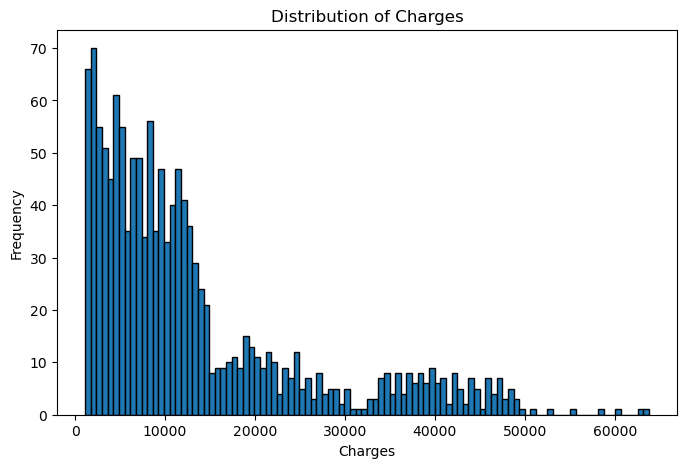

In [448]:
"""
This code creates a DataFrame named predicted_df using 
the X_test data, with columns labeled 'age' and 'bmi'. 
It then adds a new column 'charges' containing the predicted charges (predicted_charges)
"""
plt.figure(figsize=(8, 5))

plt.hist(df['charges'], bins=100, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()


In [449]:
"""
 Defining a function label_encoder that performs label encoding on a given column. 
 Label encoding is a technique used to convert categorical values into numerical values.
"""
def label_encoder(column):
    labels = column.unique()
    label_dict = {label: i for i, label in enumerate(labels)}
    encoded_column = column.map(label_dict)
    return encoded_column

# Encode the 'sex' column
df['sex'] = label_encoder(df['sex'])

# Encode the 'smoker' column
df['smoker'] = label_encoder(df['smoker'])

# Encode the 'region' column
df['region'] = label_encoder(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


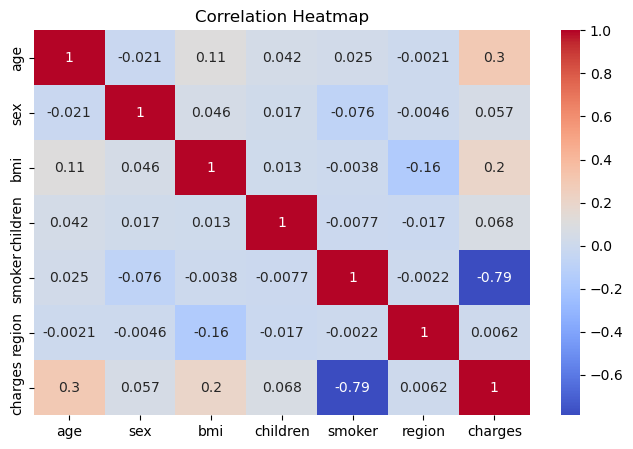

In [450]:
"""
The correlation heatmap provides a visual representation of the pairwise correlations between the numerical columns in the DataFrame.
It helps identify the strength and direction of relationships between variables
"""
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [451]:
"""
he code removes the columns "children", "region", "smoker", and "sex" from both the X_train
and X_test DataFrames. It also filters the df DataFrame to include only rows with 
charges less than or equal to 50,000.
"""

X_train.drop(["children", "region", "smoker", "sex"], axis=1, inplace=True)
X_test.drop(["children", "region", "smoker", "sex"], axis=1, inplace=True)
# Remove rows with charges greater than 50,000
df = df[df['charges'] <= 50000]

# Verify the updated dataset
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       0       0  16884.92400
1      18    1  33.770         1       1       1   1725.55230
2      28    1  33.000         3       1       1   4449.46200
3      33    1  22.705         0       1       2  21984.47061
4      32    1  28.880         0       1       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       1       2  10600.54830
1334   18    0  31.920         0       1       3   2205.98080
1335   18    0  36.850         0       1       1   1629.83350
1336   21    0  25.800         0       1       0   2007.94500
1337   61    0  29.070         0       0       2  29141.36030

[1331 rows x 7 columns]


In [430]:
# Create a 3D scatter plot figure
fig = go.Figure(data=go.Scatter3d(
    x=df['bmi'],
    y=df['age'],
    z=df['charges'],
    mode='markers',
    marker=dict(
        size=3,
        color=df['bmi'],
        colorscale='Viridis',  # Use a colorscale for the BMI values
        opacity=0.8
    )
))

# Set axis labels and title
fig.update_layout(
    scene=dict(
           xaxis=dict(
            title='BMI',
            autorange='reversed'  # Reverse the axis direction
        ),

        yaxis_title='Age',
        zaxis_title='Charges'
    ),
    title='Interactive 3D Scatter Plot: BMI and Age vs Charges',
    width=700,  # Set the width of the figure
    height=750  # Set the height of the figure
)

fig.show()


In [407]:
"""
 implementing a function that performs multiple linear regression using 
 gradient descent to estimate the parameters (coefficients) of the linear regression model
"""
def multiple_linear_regression(X, y, num_iterations, learning_rate):
    m = len(y)  # Number of training examples
    n = X.shape[1]  # Number of features

    # Add a column of ones to X for the intercept term
    X = np.hstack((np.ones((m, 1)), X))

    # Initialize the parameters
    theta = np.zeros(n + 1)                

    for _ in range(num_iterations):
        # Calculate the hypothesis/predictions
        h = np.dot(X, theta)

        # Calculate the error
        error = h - y

        # Calculate the gradients
        gradients = np.dot(X.T, error) / m

        # Update the parameters
        theta -= learning_rate * gradients

    return theta

In [432]:
"""
Performing an optimization process for multiple linear regression by 
iteratively selecting random values for num_iterations and learning_rate.
It aims to find the optimal combination of these hyperparameters that results in the 
lowest mean absolute error (MAE) on the test dataset.
"""
best_mae = float('inf')  # Initialize with a high value

# Define the range of values for num_iterations and learning_rate
num_iterations_values = [1000, 5000, 100000]
learning_rate_values = [0.000001, 0.0000005, 0.00001]

for _ in range(100):
    # Randomly select values for num_iterations and learning_rate
    num_iterations = np.random.choice(num_iterations_values)
    learning_rate = np.random.choice(learning_rate_values)

    # Perform multiple linear regression with the current values
    theta = multiple_linear_regression(X_train, y_train, num_iterations, learning_rate)

    # Calculate the predicted charges using the optimized coefficients
    X_test_with_intercept = np.column_stack((np.ones(len(X_test)), X_test))
    predicted_charges = np.dot(X_test_with_intercept, theta)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, predicted_charges)

    # Check if the current mean absolute error is the lowest
    if mae < best_mae:
        best_mae = mae
        best_theta = theta

# Print the optimized coefficients with the lowest mean absolute error
print("Optimized coefficients (theta):", best_theta)

# Print the lowest mean absolute error
print("Lowest Mean Absolute Error:", best_mae), # Create a DataFrame for the predicted dataset
predicted_df = pd.DataFrame(X_test, columns=['age', 'bmi'])
predicted_df['charges'] = predicted_charges


# Display the predicted dataset
print(predicted_df)


Optimized coefficients (theta): [  3.59514662 156.23452901 115.05842183]
Lowest Mean Absolute Error: 8125.42216962642
      age    bmi       charges
1000   30  22.99   9995.257833
1001   24  32.70  10331.216584
1002   24  25.80   9188.973765
1003   48  29.60  14903.868300
1004   47  19.19  12968.661805
...   ...    ...           ...
1333   50  30.97  15554.480878
1334   18  31.92   8930.635165
1335   18  36.85   9746.759382
1336   21  25.80   8553.244606
1337   61  29.07  17570.957163

[338 rows x 3 columns]


In [429]:
# Generate data for the plane
x = np.linspace(df['age'].min(), df['age'].max(), 10)
y = np.linspace(df['bmi'].min(), df['bmi'].max(), 10)
X, Y = np.meshgrid(x, y)
Z = theta[0] + theta[1]*X + theta[2]*Y

# Create the scatter plot
scatter = go.Scatter3d(
    x=df['age'],
    y=df['bmi'],
    z=df['charges'],
    mode='markers',
    marker=dict(
        color=df['bmi'],
        colorscale='Viridis',  # Use a colorscale for the BMI values
        #color='blue',
        size=3,
        opacity=0.8
    ),
    name='Data Points'
)

# Create the fitted plane surface
surface = go.Surface(
    x=x,
    y=y,
    z=Z,
    colorscale='Viridis',
    opacity=0.6,
    showscale=False,
    name='Fitted Plane'
)

# Create the layout
layout = go.Layout(
    title='3D Scatter Plot with Fitted Plane',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='BMI'),
        zaxis=dict(title='Charges')
    ),
    width=700,  # Set the width of the figure
    height=750  # Set the height of the figure

)
# Create the figure and add the scatter plot and surface
fig = go.Figure(data=[scatter, surface], layout=layout)   
title='Interactive 3D Scatter Plot: BMI and Age vs Charges',
# Show the figure
fig.show()
